In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import xgboost as xgb

import wrangle as wr
import explore as ex
import model as mod

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline
pd.options.display.max_columns = None

np.set_printoptions(suppress=True)

seed = 42

# acquire and prep

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')


In [4]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [2]:
def get_heart_disease():
    
    df = pd.read_csv('heart_2020_cleaned.csv')
    
    df = df.rename(columns={'HeartDisease': 'heart_disease',
                       'BMI': 'bmi', 
                       'Smoking': 'smoker',
                       'AlcoholDrinking': 'heavy_drinker',
                       'Stroke': 'stroke',
                       'PhysicalHealth': 'physical_health',
                       'MentalHealth': 'mental_health',
                       'DiffWalking': 'difficulty_walking',
                       'Sex': 'sex',
                       'AgeCategory': 'age_group',
                       'Race': 'race',
                       'Diabetic': 'diabetic',
                       'PhysicalActivity': 'physically_active',
                       'GenHealth': 'general_health',
                       'SleepTime': 'sleep_time',
                       'Asthma': 'asthma',
                       'KidneyDisease': 'kidney_disease',
                       'SkinCancer': 'skin_cancer'
                       })
    
    df = df.replace({'Yes': 1, 'No': 0})
    
    df = df[df['diabetic'] != 'No, borderline diabetes']
    df = df[df['diabetic'] != 'Yes (during pregnancy)']
    df['diabetic'] = df['diabetic'].astype(int)
    
    return df

In [3]:
df = get_heart_disease()

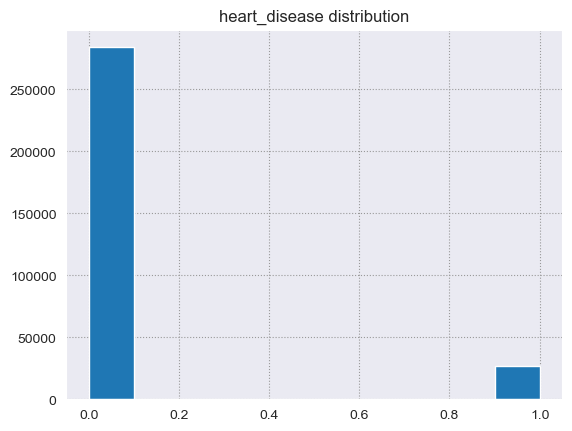

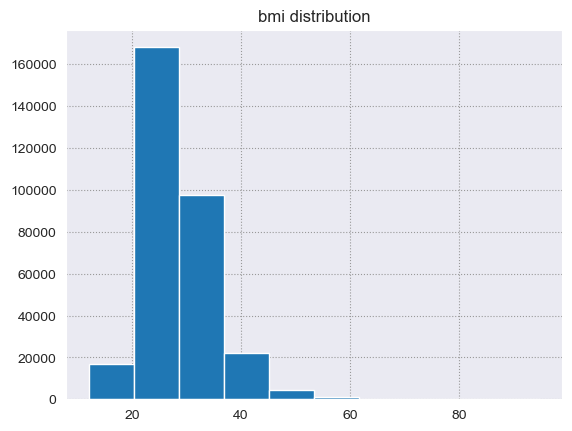

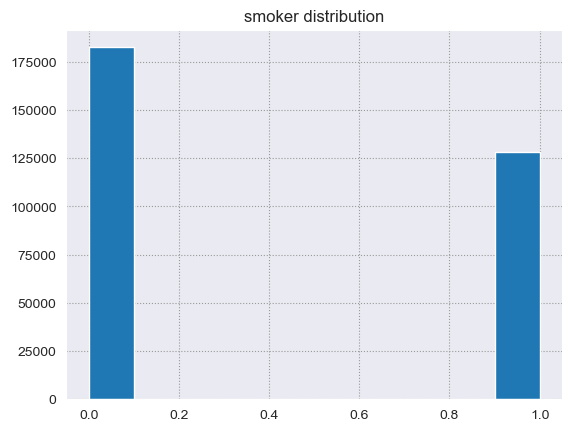

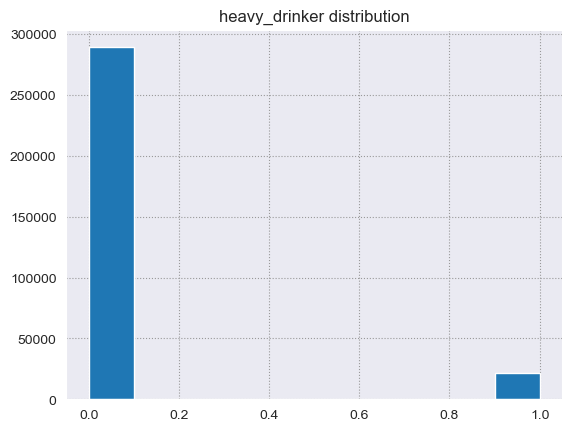

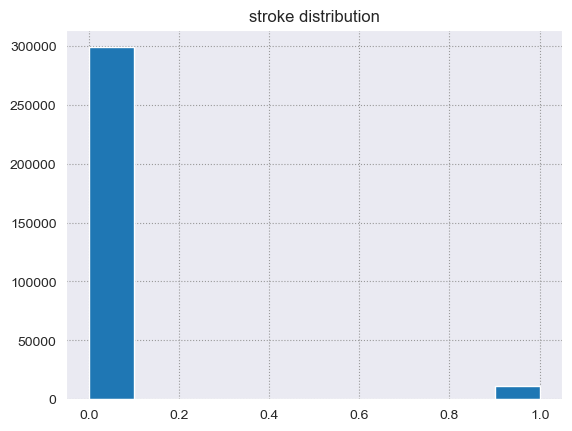

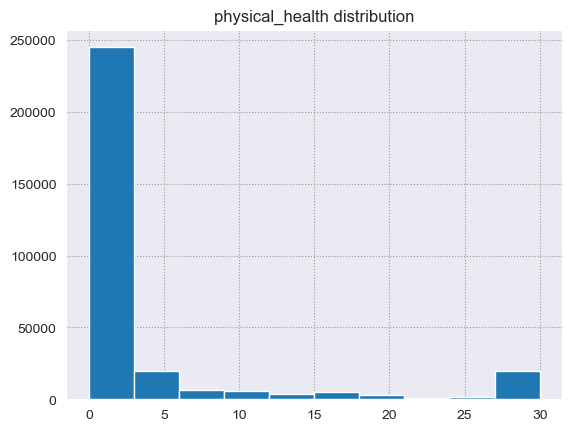

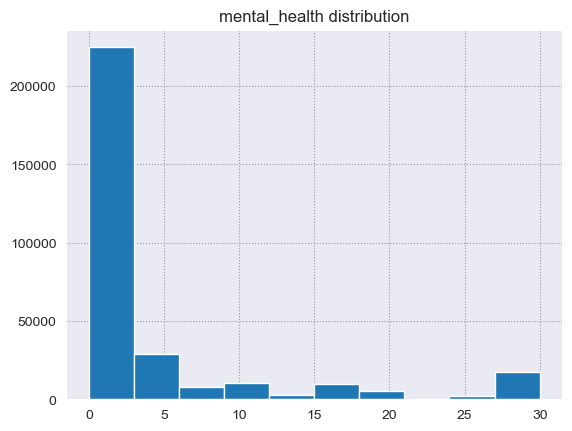

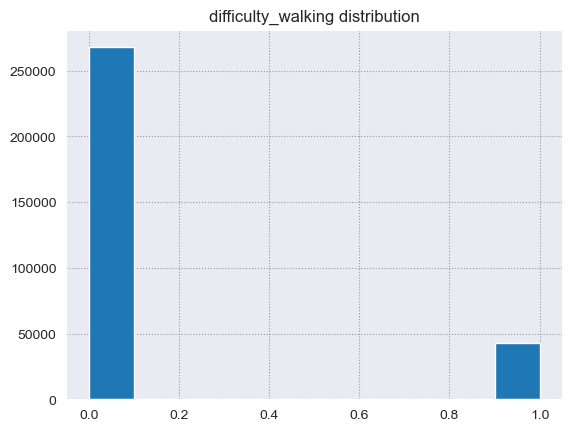

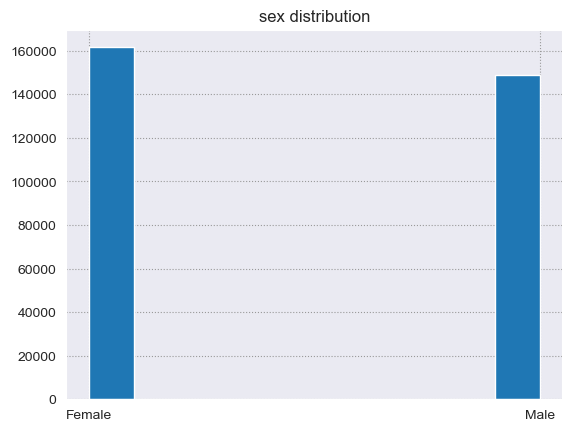

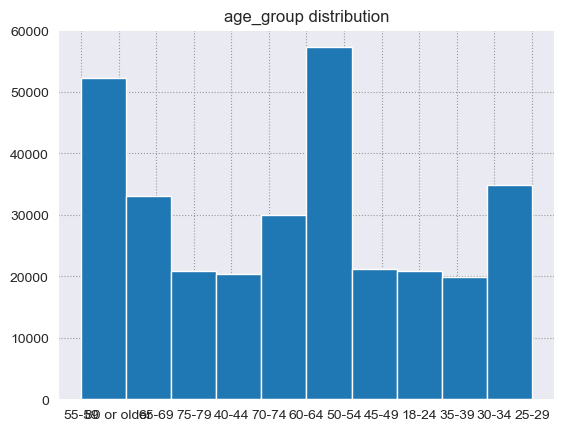

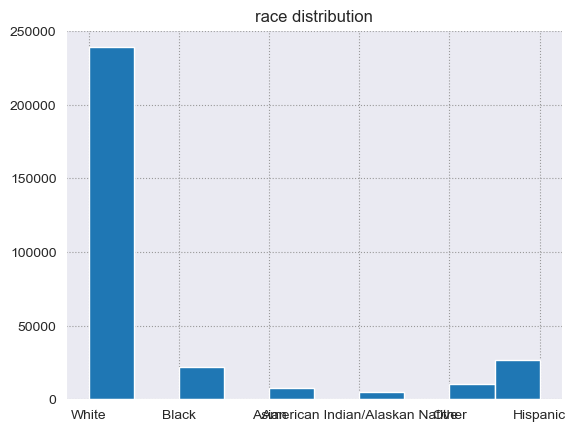

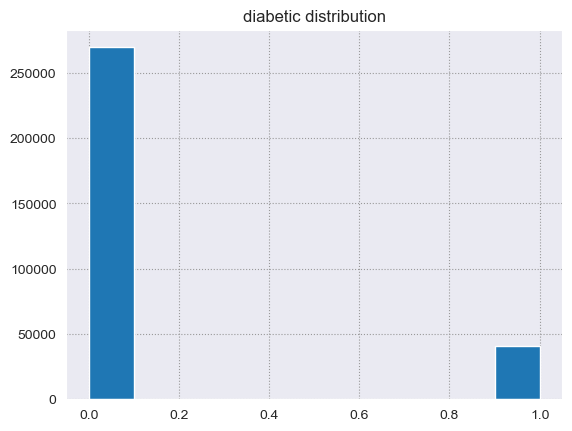

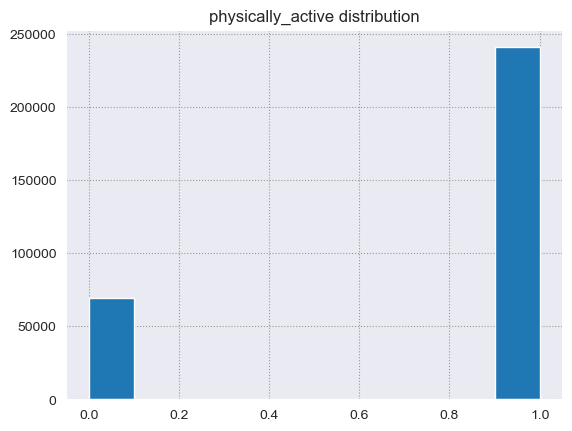

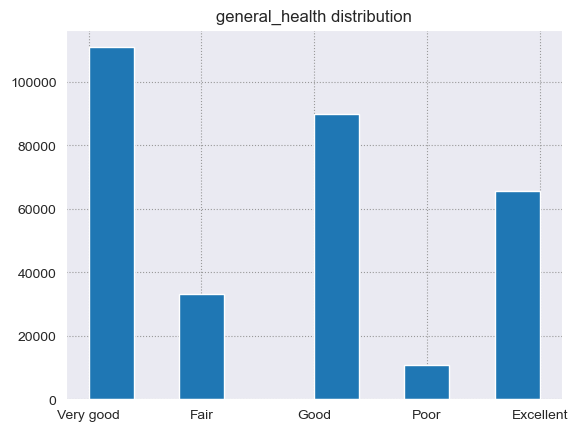

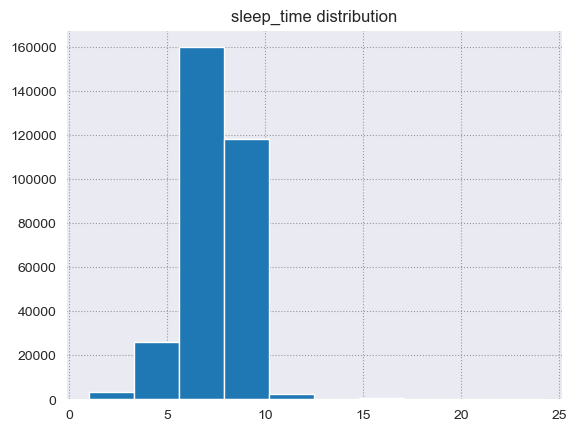

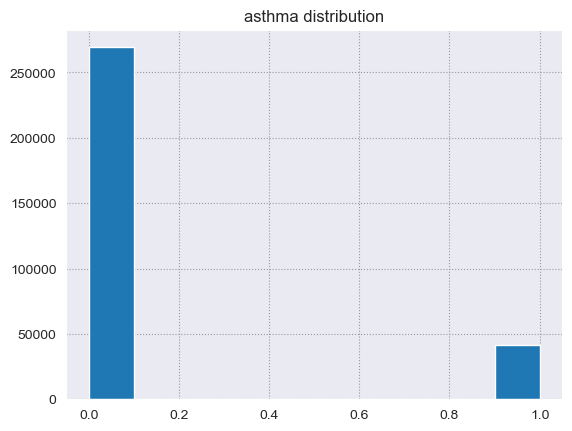

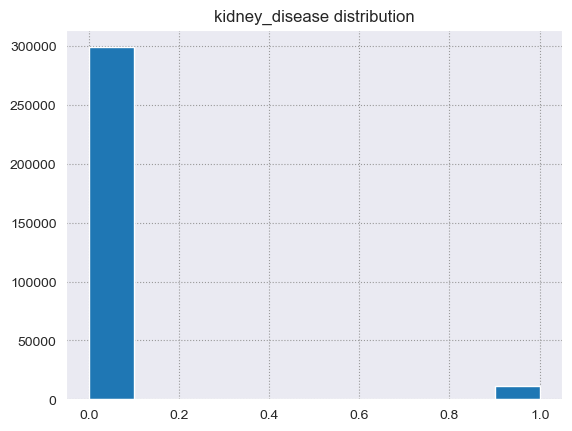

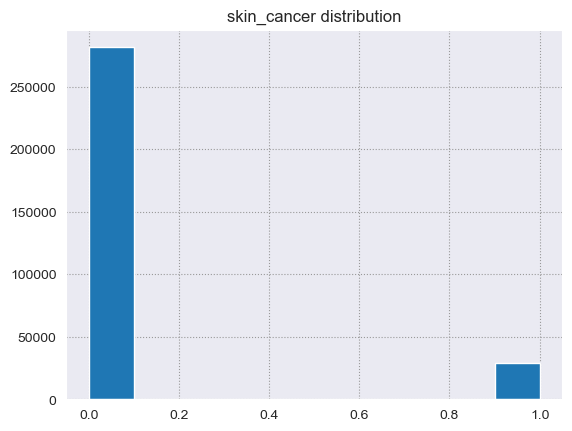

In [4]:
for col in df.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [5]:
df.columns

Index(['heart_disease', 'bmi', 'smoker', 'heavy_drinker', 'stroke',
       'physical_health', 'mental_health', 'difficulty_walking', 'sex',
       'age_group', 'race', 'diabetic', 'physically_active', 'general_health',
       'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer'],
      dtype='object')

In [6]:
cont_cols = ['sleep_time']

cat_cols = ['smoker', 'heavy_drinker', 'stroke', 'difficulty_walking', 'sex', 'age_group', 'race', 
            'diabetic', 'physically_active', 'general_health', 'asthma', 'kidney_disease', 'skin_cancer', 'heart_disease']

In [7]:
df = wr.remove_outliers(df, 3, cont_cols)

In [8]:
df

,heart_disease,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


# exploration

In [9]:
train, validate, test = wr.subset_df(df, stratify='heart_disease')

(185745, 18) (61915, 18) (61916, 18)


## comparing the features included in my initial hypothesis against the target:

### bmi vs heart disease

In [10]:
ex.mannwhitney_report(train['bmi'], train['heart_disease'])

T-Statistic = 34501205025.0000
p-value     = 0.0
Is p-value < alpha? True


In [11]:
ex.spearmanr_report(train['bmi'], train['heart_disease'])

Correlation = 0.0569
p-value     = 4.845620033698174e-133
Is p-value < alpha? True


In [12]:
ex.pearsonr_report(train['bmi'], train['heart_disease'])

Correlation = 0.0524
p-value     = 2.985392219120848e-113
Is p-value < alpha? True


### physical health vs heart disease

In [13]:
ex.mannwhitney_report(train['physical_health'], train['heart_disease'])

T-Statistic = 21154796842.5000
p-value     = 0.0
Is p-value < alpha? True


In [14]:
ex.spearmanr_report(train['physical_health'], train['heart_disease'])

Correlation = 0.1401
p-value     = 0.0
Is p-value < alpha? True


### difficulty walking vs heart disease

In [15]:
ex.chi2_report(train, 'difficulty_walking', 'heart_disease')

Observed Values

[[150287  10045]
 [ 19634   5779]]
---
Expected Values

[[146672  13659]
 [ 23248   2164]]
---

chi^2 = 7637.8552
p     = 0.0
Is p-value < alpha? True


### age vs heart disease

In [16]:
train.head()

,heart_disease,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
190907,1,24.45,1,0,0,2.0,3.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
171804,0,22.63,1,0,0,0.0,0.0,0,Female,35-39,White,0,1,Excellent,7.0,0,0,0
275334,1,29.65,0,0,0,0.0,0.0,0,Male,55-59,White,0,0,Very good,7.0,0,0,0
221471,0,28.97,0,0,0,0.0,0.0,0,Female,40-44,White,0,1,Very good,7.0,0,0,0
46167,1,22.26,0,0,0,30.0,0.0,0,Female,75-79,White,0,0,Very good,9.0,0,0,0


In [17]:
ex.chi2_report(train, 'age_group', 'heart_disease')

Observed Values

[[12380    63]
 [ 9848    79]
 [10735   127]
 [11786   166]
 [11928   288]
 [12259   397]
 [13752   788]
 [16017  1266]
 [17680  1893]
 [17524  2338]
 [15178  2823]
 [10071  2397]
 [10763  3199]]
---
Expected Values

[[11382  1060]
 [ 9081   845]
 [ 9936   925]
 [10933  1018]
 [11175  1040]
 [11577  1078]
 [13301  1238]
 [15810  1472]
 [17905  1667]
 [18169  1692]
 [16467  1533]
 [11405  1062]
 [12772  1189]]
---

chi^2 = 11626.9818
p     = 0.0
Is p-value < alpha? True


### physically active vs heart disease

In [18]:
ex.chi2_report(train, 'physically_active', 'heart_disease')

Observed Values

[[ 35757   5775]
 [134164  10049]]
---
Expected Values

[[ 37993   3538]
 [131927  12285]]
---

chi^2 = 1990.0417
p     = 0.0
Is p-value < alpha? True


## q1 - physical activity vs bmi

In [19]:
df.dtypes

heart_disease           int64
bmi                   float64
smoker                  int64
heavy_drinker           int64
stroke                  int64
physical_health       float64
mental_health         float64
difficulty_walking      int64
sex                    object
age_group              object
race                   object
diabetic                int64
physically_active       int64
general_health         object
sleep_time            float64
asthma                  int64
kidney_disease          int64
skin_cancer             int64
dtype: object

physically active is a categorical column, while bmi is continuous, so i will run a mann whitney u test

In [20]:
ex.mannwhitney_report(train['bmi'], train['physically_active'])

T-Statistic = 34501205025.0000
p-value     = 0.0
Is p-value < alpha? True


In [21]:
train['bmi'].mean()

28.28058294974052

<AxesSubplot:xlabel='physically_active', ylabel='bmi'>

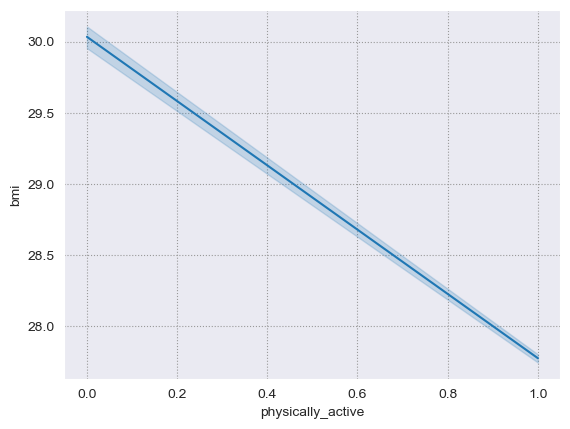

In [22]:
sns.lineplot(data=train, x='physically_active', y='bmi')

Unsurprisingly, there is a direct relationship between someone being (or not being) physically active and their bmi

## q2 - stroke vs heart disease

In [23]:
ex.chi2_report(train, 'stroke', 'heart_disease')

Observed Values

[[165531  13322]
 [  4390   2502]]
---
Expected Values

[[163616  15236]
 [  6304    587]]
---

chi^2 = 7085.8525
p     = 0.0
Is p-value < alpha? True


<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>

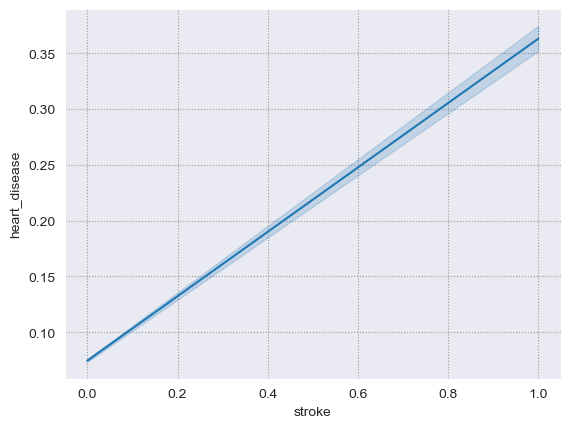

In [24]:
sns.lineplot(data=train, x='stroke', y='heart_disease')

Again, unsurprisingly, there is a correlation between someone having heart disease and someone having a stroke

## q3 - physical and mental health

In [25]:
ex.chi2_report(train, 'physical_health', 'mental_health')

Observed Values

[[95000  3344  6326  3926  1874  5120   451  1890   339    58  3432    25
    220    36   606  2969    31    30    57     2  1255    85    24    17
     18   465     9    31   121    66  4122]
 [ 2898   632   521   360   174   362    56   133    25     5   220     0
     10     2    44   217     5     0     6     0   118     8     1     1
      0    33     0     4    16     9   206]
 [ 4177   482   782   383   310   583    64   269    55     9   406     5
     44     8    72   342     7    12     9     0   211    12     2     3
      2    66     2     6    21    12   378]
 [ 2272   237   369   326   134   343    46   141    31     5   249     2
     19     1    55   221     6     2    10     1   148     7     2     3
      1    40     0     7    13     4   290]
 [ 1212    84   216    89   135   102    49    90    20     6   110     0
     17     4    21   120     2     2     4     0    80     2     4     1
      0    29     0     2     8     4   184]
 [ 2065   147   28

In [26]:
train.head()

,heart_disease,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
190907,1,24.45,1,0,0,2.0,3.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
171804,0,22.63,1,0,0,0.0,0.0,0,Female,35-39,White,0,1,Excellent,7.0,0,0,0
275334,1,29.65,0,0,0,0.0,0.0,0,Male,55-59,White,0,0,Very good,7.0,0,0,0
221471,0,28.97,0,0,0,0.0,0.0,0,Female,40-44,White,0,1,Very good,7.0,0,0,0
46167,1,22.26,0,0,0,30.0,0.0,0,Female,75-79,White,0,0,Very good,9.0,0,0,0


<AxesSubplot:xlabel='physical_health', ylabel='mental_health'>

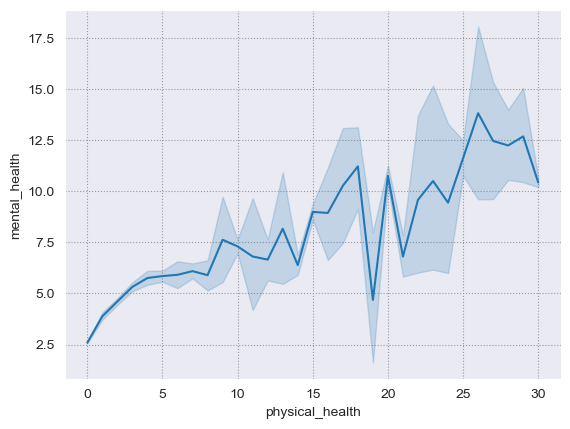

In [27]:
sns.lineplot(data=train, x='physical_health', y='mental_health')

Based upon the statistical test run (a chi^2 test), there is a relationship between the two features

Moving into modeling, I will try clustering these two together

## q4 diabetic and bmi

In [28]:
train

,heart_disease,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
190907,1,24.45,1,0,0,2.0,3.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
171804,0,22.63,1,0,0,0.0,0.0,0,Female,35-39,White,0,1,Excellent,7.0,0,0,0
275334,1,29.65,0,0,0,0.0,0.0,0,Male,55-59,White,0,0,Very good,7.0,0,0,0
221471,0,28.97,0,0,0,0.0,0.0,0,Female,40-44,White,0,1,Very good,7.0,0,0,0
46167,1,22.26,0,0,0,30.0,0.0,0,Female,75-79,White,0,0,Very good,9.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124327,0,21.41,0,0,0,0.0,0.0,0,Male,25-29,White,0,1,Excellent,8.0,0,0,0
267819,0,25.10,0,1,0,2.0,15.0,0,Female,25-29,Hispanic,0,1,Very good,7.0,0,0,0
136737,0,30.13,0,0,0,0.0,0.0,0,Male,45-49,White,0,0,Very good,7.0,0,0,0
152131,0,28.37,1,0,0,0.0,2.0,0,Male,40-44,White,0,1,Very good,8.0,0,0,0


In [29]:
ex.ind_ttest_report(train['bmi'], train['diabetic'])

T-statistic = 1915.4949
p-value     = 0.0
Is p-value < alpha? True


<AxesSubplot:xlabel='diabetic', ylabel='bmi'>

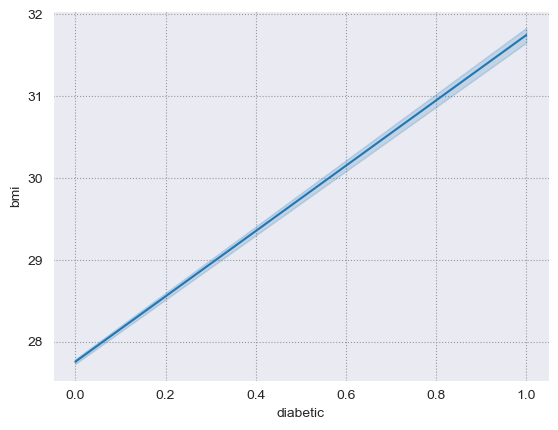

In [30]:
sns.lineplot(data=train, x='diabetic', y='bmi')

Since bmi, diatebes, and physical activity are all related to each other, I will try to cluster them together

I will also try to cluster the various age groups together

# model part 1-clustering

- bmi, diabetes, and physical activity

- physical and mental health

In [31]:
train.shape

(185745, 18)

In [32]:
to_scale = ['bmi', 'sleep_time', 'physical_health', 'mental_health']

train_scaled, validate_scaled, test_scaled = wr.scale_data(train, validate, test, MinMaxScaler(), to_scale)

In [33]:
train_scaled

,heart_disease,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
190907,1,0.150411,1,0,0,0.066667,0.100000,0,Female,80 or older,White,0,1,Very good,0.500000,0,0,0
171804,0,0.128388,1,0,0,0.000000,0.000000,0,Female,35-39,White,0,1,Excellent,0.500000,0,0,0
275334,1,0.213335,0,0,0,0.000000,0.000000,0,Male,55-59,White,0,0,Very good,0.500000,0,0,0
221471,0,0.205106,0,0,0,0.000000,0.000000,0,Female,40-44,White,0,1,Very good,0.500000,0,0,0
46167,1,0.123911,0,0,0,1.000000,0.000000,0,Female,75-79,White,0,0,Very good,0.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124327,0,0.113625,0,0,0,0.000000,0.000000,0,Male,25-29,White,0,1,Excellent,0.583333,0,0,0
267819,0,0.158277,0,1,0,0.066667,0.500000,0,Female,25-29,Hispanic,0,1,Very good,0.500000,0,0,0
136737,0,0.219143,0,0,0,0.000000,0.000000,0,Male,45-49,White,0,0,Very good,0.500000,0,0,0
152131,0,0.197846,1,0,0,0.000000,0.066667,0,Male,40-44,White,0,1,Very good,0.583333,0,0,0


In [34]:
X_train, y_train, X_validate, y_validate, X_test, y_test = mod.xy_subsets(train_scaled, validate_scaled, test_scaled, 'heart_disease')

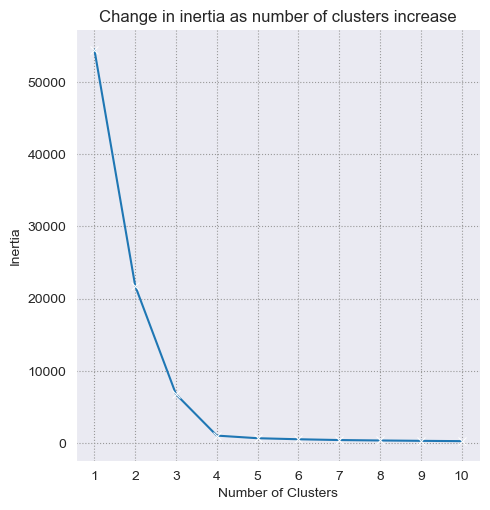

In [35]:
cols = ['bmi', 'diabetic', 'physically_active']

mod.inertial_dampening(X_train, cols, 11)

3 clusters here seems like the best fit, so I will move forward with this cluster into the classification modeling

In [36]:
def clusters_bmi_diabetic(df):
    '''
    This function takes in a dataframe, and creates and fits a clustering model on it, while adding that cluster to the dataframe and renaming the column and dropping the columns created to make the cluster.
    '''
    
    df1 = df.copy()
    
    kmeans = KMeans(n_clusters=3, random_state=seed)
    
    kmeans.fit(df1[['bmi', 'diabetic', 'physically_active']])
    df1['scaled_clusters'] = kmeans.predict(df1[['bmi', 'diabetic', 'physically_active']])
    
    sns.relplot(data=df1, x='bmi', y='diabetic', hue='scaled_clusters')
    plt.show()
    
    df1 = df1.rename(columns= {'scaled_clusters': 'cluster_areas'})
    df1 = df1.drop(columns=['bmi', 'diabetic', 'physically_active'])
    
    return df1, kmeans

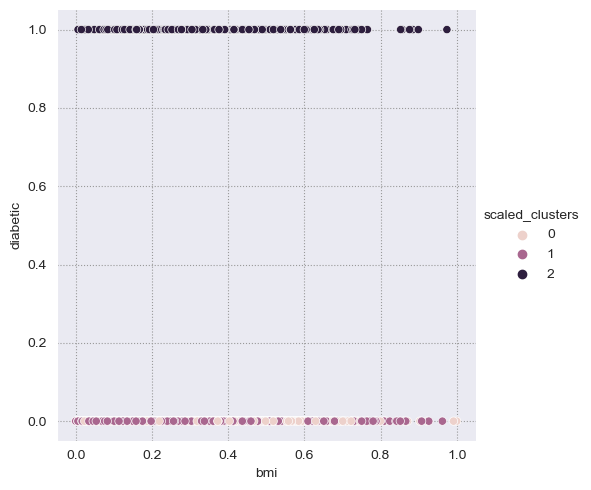

In [37]:
X_train_clusters, kmeans = clusters_bmi_diabetic(X_train)

In [38]:
X_train

,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
190907,0.150411,1,0,0,0.066667,0.100000,0,Female,80 or older,White,0,1,Very good,0.500000,0,0,0
171804,0.128388,1,0,0,0.000000,0.000000,0,Female,35-39,White,0,1,Excellent,0.500000,0,0,0
275334,0.213335,0,0,0,0.000000,0.000000,0,Male,55-59,White,0,0,Very good,0.500000,0,0,0
221471,0.205106,0,0,0,0.000000,0.000000,0,Female,40-44,White,0,1,Very good,0.500000,0,0,0
46167,0.123911,0,0,0,1.000000,0.000000,0,Female,75-79,White,0,0,Very good,0.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124327,0.113625,0,0,0,0.000000,0.000000,0,Male,25-29,White,0,1,Excellent,0.583333,0,0,0
267819,0.158277,0,1,0,0.066667,0.500000,0,Female,25-29,Hispanic,0,1,Very good,0.500000,0,0,0
136737,0.219143,0,0,0,0.000000,0.000000,0,Male,45-49,White,0,0,Very good,0.500000,0,0,0
152131,0.197846,1,0,0,0.000000,0.066667,0,Male,40-44,White,0,1,Very good,0.583333,0,0,0


In [39]:
X_train_clusters

,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,general_health,sleep_time,asthma,kidney_disease,skin_cancer,cluster_areas
190907,1,0,0,0.066667,0.100000,0,Female,80 or older,White,Very good,0.500000,0,0,0,1
171804,1,0,0,0.000000,0.000000,0,Female,35-39,White,Excellent,0.500000,0,0,0,1
275334,0,0,0,0.000000,0.000000,0,Male,55-59,White,Very good,0.500000,0,0,0,0
221471,0,0,0,0.000000,0.000000,0,Female,40-44,White,Very good,0.500000,0,0,0,1
46167,0,0,0,1.000000,0.000000,0,Female,75-79,White,Very good,0.666667,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124327,0,0,0,0.000000,0.000000,0,Male,25-29,White,Excellent,0.583333,0,0,0,1
267819,0,1,0,0.066667,0.500000,0,Female,25-29,Hispanic,Very good,0.500000,0,0,0,1
136737,0,0,0,0.000000,0.000000,0,Male,45-49,White,Very good,0.500000,0,0,0,0
152131,1,0,0,0.000000,0.066667,0,Male,40-44,White,Very good,0.583333,0,0,0,1


In [40]:
def cluster_val_test(df, model, cols, name):
    '''
    This function takes in a dataframe and a clustering model to predict off of the already fit model, and creates a column in the given dataframe, as well as renaming the column and dropping the two that the cluster were created from.
    '''
    df1 = df.copy()
    
    df1[name] = model.predict(df1[cols])
    df1 = df1.drop(columns=cols)
    
    return df1

In [41]:
cols = ['bmi', 'diabetic', 'physically_active']

X_validate_clusters = cluster_val_test(X_validate, kmeans, cols, 'clusters')
X_test_clusters = cluster_val_test(X_test, kmeans, cols, 'clusters')

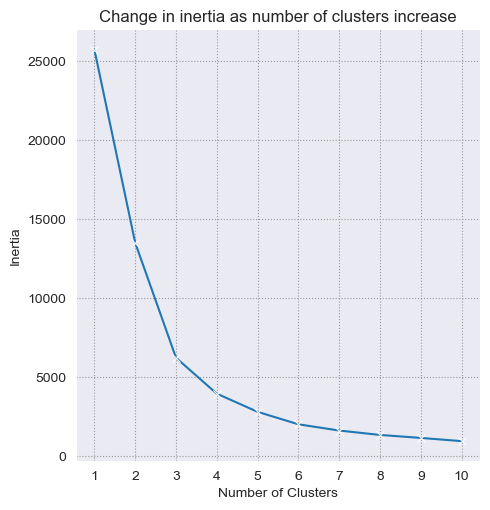

In [42]:
cols = ['physical_health', 'mental_health']

mod.inertial_dampening(train_scaled, cols, 11)

Again, 3 clusters seems to be the best fit here, so I will move forward with 3

In [43]:
def clusters_overall_health(df):
    '''
    This function takes in a dataframe, and creates and fits a clustering model on it, while adding that cluster to the dataframe and renaming the column and dropping the columns created to make the cluster.
    '''
    df1 = df.copy()

    kmeans = KMeans(n_clusters=3, random_state=seed)
    
    kmeans.fit(df1[['physical_health', 'mental_health']])
    df1['scaled_clusters'] = kmeans.predict(df1[['physical_health', 'mental_health']])

    sns.relplot(data=df1, x='physical_health', y='mental_health', hue='scaled_clusters')
    plt.show()
    
    df1 = df1.rename(columns= {'scaled_clusters': 'overall_health'})
    df1 = df1.drop(columns=['physical_health', 'mental_health'])
    
    return df1, kmeans

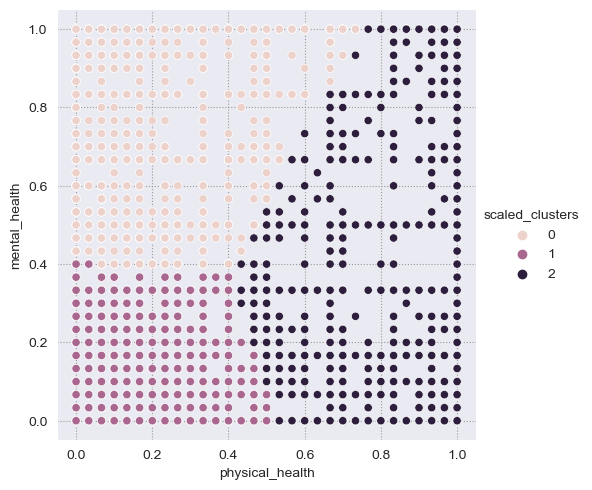

In [44]:
X_train_clusters, kmeans = clusters_overall_health(X_train_clusters)

In [45]:
X_train_clusters

,smoker,heavy_drinker,stroke,difficulty_walking,sex,age_group,race,general_health,sleep_time,asthma,kidney_disease,skin_cancer,cluster_areas,overall_health
190907,1,0,0,0,Female,80 or older,White,Very good,0.500000,0,0,0,1,1
171804,1,0,0,0,Female,35-39,White,Excellent,0.500000,0,0,0,1,1
275334,0,0,0,0,Male,55-59,White,Very good,0.500000,0,0,0,0,1
221471,0,0,0,0,Female,40-44,White,Very good,0.500000,0,0,0,1,1
46167,0,0,0,0,Female,75-79,White,Very good,0.666667,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124327,0,0,0,0,Male,25-29,White,Excellent,0.583333,0,0,0,1,1
267819,0,1,0,0,Female,25-29,Hispanic,Very good,0.500000,0,0,0,1,0
136737,0,0,0,0,Male,45-49,White,Very good,0.500000,0,0,0,0,1
152131,1,0,0,0,Male,40-44,White,Very good,0.583333,0,0,0,1,1


In [46]:
X_train

,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,sex,age_group,race,diabetic,physically_active,general_health,sleep_time,asthma,kidney_disease,skin_cancer
190907,0.150411,1,0,0,0.066667,0.100000,0,Female,80 or older,White,0,1,Very good,0.500000,0,0,0
171804,0.128388,1,0,0,0.000000,0.000000,0,Female,35-39,White,0,1,Excellent,0.500000,0,0,0
275334,0.213335,0,0,0,0.000000,0.000000,0,Male,55-59,White,0,0,Very good,0.500000,0,0,0
221471,0.205106,0,0,0,0.000000,0.000000,0,Female,40-44,White,0,1,Very good,0.500000,0,0,0
46167,0.123911,0,0,0,1.000000,0.000000,0,Female,75-79,White,0,0,Very good,0.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124327,0.113625,0,0,0,0.000000,0.000000,0,Male,25-29,White,0,1,Excellent,0.583333,0,0,0
267819,0.158277,0,1,0,0.066667,0.500000,0,Female,25-29,Hispanic,0,1,Very good,0.500000,0,0,0
136737,0.219143,0,0,0,0.000000,0.000000,0,Male,45-49,White,0,0,Very good,0.500000,0,0,0
152131,0.197846,1,0,0,0.000000,0.066667,0,Male,40-44,White,0,1,Very good,0.583333,0,0,0


In [47]:
def cluster_val_test(df, model, cols, name):
    '''
    This function takes in a dataframe and a clustering model to predict off of the already fit model, and creates a column in the given dataframe, as well as renaming the column and dropping the two that the cluster were created from.
    '''
    df1 = df.copy()
    
    df1[name] = model.predict(df1[cols])
    df1 = df1.drop(columns=cols)
    
    return df1

In [48]:
cols = ['physical_health', 'mental_health']

X_validate_clusters = cluster_val_test(X_validate_clusters, kmeans, cols, 'overall_health')
X_test_clusters = cluster_val_test(X_test_clusters, kmeans, cols, 'overall_health')

# model part 2 - classification

In [49]:
X_train_clusters.head()

,smoker,heavy_drinker,stroke,difficulty_walking,sex,age_group,race,general_health,sleep_time,asthma,kidney_disease,skin_cancer,cluster_areas,overall_health
190907,1,0,0,0,Female,80 or older,White,Very good,0.500000,0,0,0,1,1
171804,1,0,0,0,Female,35-39,White,Excellent,0.500000,0,0,0,1,1
275334,0,0,0,0,Male,55-59,White,Very good,0.500000,0,0,0,0,1
221471,0,0,0,0,Female,40-44,White,Very good,0.500000,0,0,0,1,1
46167,0,0,0,0,Female,75-79,White,Very good,0.666667,0,0,0,0,2


In [50]:
#col = ['sex', 'age_group', 'race', 'general_health', 'sleep_time']

#X_train_clusters = X_train_clusters.drop(columns= col)

In [51]:
#X_validate_clusters = X_validate_clusters.drop(columns= col)

In [52]:
#X_train = X_train.drop(columns= col)
#X_validate = X_validate.drop(columns= col)

In [53]:
to_dummy = ['sex', 'age_group', 'race', 'general_health']

X_train_clusters = pd.get_dummies(X_train_clusters, columns=to_dummy, drop_first=True)
X_validate_clusters = pd.get_dummies(X_validate_clusters, columns=to_dummy, drop_first=True)
X_test_clusters = pd.get_dummies(X_test_clusters, columns=to_dummy, drop_first=True)

In [54]:
to_dummy = ['sex', 'age_group', 'race', 'general_health']

X_train = pd.get_dummies(X_train, columns=to_dummy, drop_first=True)
X_validate = pd.get_dummies(X_validate, columns=to_dummy, drop_first=True)
X_test = pd.get_dummies(X_test, columns=to_dummy, drop_first=True)

In [55]:
mod.make_baseline(train, 'baseline', 'heart_disease')

Baseline Accuracy is: 0.915


In [56]:
#mod.rf_gen(X_train, y_train, X_validate, y_validate)

In [57]:
mod.rf_model(X_train_clusters, y_train, X_validate_clusters, y_validate)

Train accuracy is: 0.92
-----

Validate accuracy is: 0.91


In [58]:
#mod.dectree_gen(X_train_clusters, y_train, X_validate_clusters, y_validate)

In [59]:
#mod.knn_gen(X_train_clusters, y_train, X_validate_clusters, y_validate)

In [60]:
X_train

,bmi,smoker,heavy_drinker,stroke,physical_health,mental_health,difficulty_walking,diabetic,physically_active,sleep_time,asthma,kidney_disease,skin_cancer,sex_Male,age_group_25-29,age_group_30-34,age_group_35-39,age_group_40-44,age_group_45-49,age_group_50-54,age_group_55-59,age_group_60-64,age_group_65-69,age_group_70-74,age_group_75-79,age_group_80 or older,race_Asian,race_Black,race_Hispanic,race_Other,race_White,general_health_Fair,general_health_Good,general_health_Poor,general_health_Very good
190907,0.150411,1,0,0,0.066667,0.100000,0,0,1,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
171804,0.128388,1,0,0,0.000000,0.000000,0,0,1,0.500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
275334,0.213335,0,0,0,0.000000,0.000000,0,0,0,0.500000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
221471,0.205106,0,0,0,0.000000,0.000000,0,0,1,0.500000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
46167,0.123911,0,0,0,1.000000,0.000000,0,0,0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124327,0.113625,0,0,0,0.000000,0.000000,0,0,1,0.583333,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
267819,0.158277,0,1,0,0.066667,0.500000,0,0,1,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
136737,0.219143,0,0,0,0.000000,0.000000,0,0,0,0.500000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
152131,0.197846,1,0,0,0.000000,0.066667,0,0,1,0.583333,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train_clusters, y_train)

# Predict
preds = xgb_cl.predict(X_validate_clusters)

In [ ]:
accuracy_score(y_validate, preds)